In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14
print(len(fish_data), len(fish_target))

49 49


In [3]:
import numpy as np

In [4]:
"""
numpy의 2차원 데이터 만드는 함수 사용
- np.column_stack(): 튜플로 전달한 각각의 데이터를 열로 만들어 합침
"""
fish_data = np.column_stack((fish_length, fish_weight))
fish_data.shape

(49, 2)

In [9]:
"""
numpy의 one-hot데이터 생성함수 사용
- np.concatenate(): 튜플로 전달한 각각의 데이터를 하나의 배열로 합침
- np.ones(): 전달한 수만큼 1로 채워진 배열 생성
- np.zeros(): 전달한 수만큼 0로 채워진 배열 생성
"""
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
fish_target.shape

(49,)

In [47]:
"""
train_test_split(독립데이터 전체, 종속데이터 전체, 훈련데이터와 테스트데이터 분류 비율, 랜덤규칙)
- 랜덤하게 섞으면서 일정 비율로 훈련/테스트 데이터로 분류해줌
- 반환되는 값은 총 4개(순서 중요, 앞input뒤target): train_input, test_input, train_target, test_target
- 거의 모든 모델에서 사용
"""
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_data, 
                                                                      fish_target, 
                                                                      test_size=0.3, 
                                                                      random_state=42)
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)
train_input[:, 0]

(34, 2) (34,)
(15, 2) (15,)


array([29.7, 11.3, 11.8, 13. , 32. , 30.7, 33. , 35. , 41. , 38.5, 25.4,
       12. , 39.5, 29.7, 37. , 31. , 10.5, 26.3, 34. , 26.5, 10.6,  9.8,
       35. , 11.2, 31. , 34.5, 33.5, 15. , 34. , 30. , 11.8, 32. , 36. ,
       11. ])

In [13]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier().fit(train_input, train_target)

In [14]:
kn.score(test_input, test_target)

1.0

In [15]:
kn.predict([[25, 150]])

array([0.])

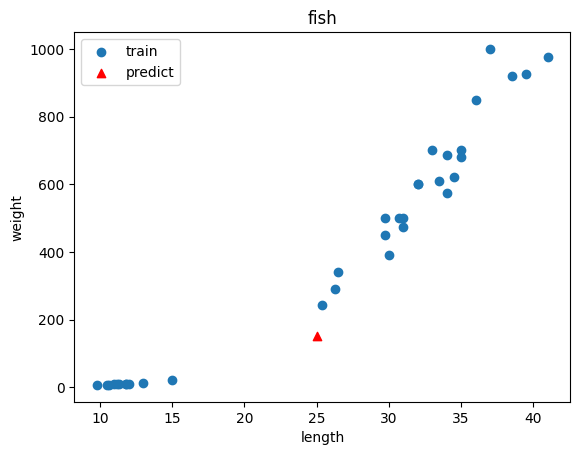

In [36]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:, 0], train_input[:, 1], label="train")
plt.scatter(25, 150, marker="^", c="r", label="predict")
plt.xlabel("length")
plt.ylabel("weight")
plt.title("fish")
plt.legend()
plt.show()

In [39]:
# 최근접 이웃 5개의 값 확인하기
distances, indexes = kn.kneighbors([[25, 150]])
print("거리:", distances, "\n인덱스위치:", indexes)

거리: [[ 92.00086956 130.48375378 138.32150953 140.00603558 140.62090883]] 
인덱스위치: [[10 27  3 17  2]]


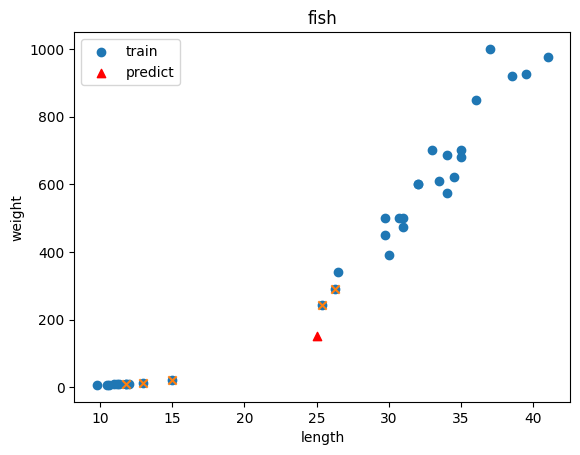

In [42]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:, 0], train_input[:, 1], label="train")
plt.scatter(25, 150, marker="^", c="r", label="predict")
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker="x")
plt.xlabel("length")
plt.ylabel("weight")
plt.title("fish")
plt.legend()
plt.show()

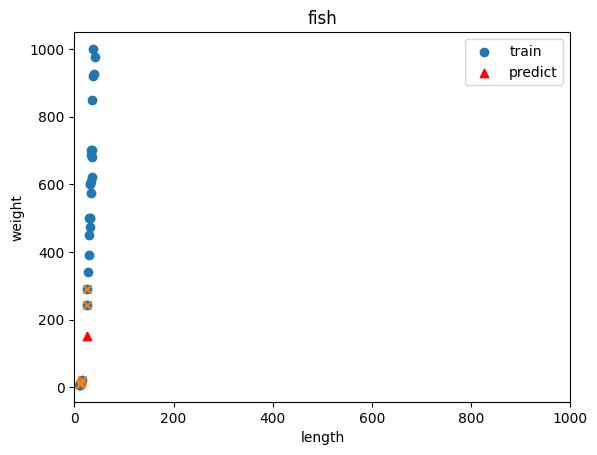

In [44]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:, 0], train_input[:, 1], label="train")
plt.scatter(25, 150, marker="^", c="r", label="predict")
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker="x")

# matplotlib의 대부분의 그래프는 x, y값들의 차원에 상관없이 대부분 그릴수 있음? 
# x축의 범위를 y축과 동일하게 만듬 --> 단위 통일
plt.xlim(0, 1000)

plt.xlabel("length")
plt.ylabel("weight")
plt.title("fish")
plt.legend()
plt.show()

# 스케일 오류
: 단위가 서로 다른 데이터를 사용하는 경우, 눈으로 확인했을때와 결과가 다를 수 있음
- 데이터들의 단위의 차이가 커 데이터의 일관성 떨어지는 경우 발생
- 정규화: 스케일 오류 해소 위한 전처리